In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import pickle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17                                                                                                                                           
# for scikit-learn >= 0.18 use:                                                                                                                                                                                  
from sklearn.model_selection import train_test_split                                                                                                                                                           
# from sklearn.cross_validation import train_test_split

from scipy.ndimage.measurements import label
import importlib

In [4]:
import vehicledet2
importlib.reload(vehicledet2)
from vehicledet2 import *

In [26]:
X_train, y_train, X_test, y_test = preprocessData()
acc=train(X_train, y_train, X_test, y_test)

/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
23.57 Seconds to train SVC...
Test Accuracy of SVC =  0.9865


In [27]:
acc=train(X_train, y_train, X_test, y_test)

24.4 Seconds to train SVC...
Test Accuracy of SVC =  0.9865


In [32]:
cs = ['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']
hog_channel = [0, 1, 2, 'ALL']
all_acc=[]
for c in cs:
    sublist = []
    for hc in hog_channel:
        print("\ncolorspace:{}, hog_channel:{}".format(c, hc))
        try:
            X_train, y_train, X_test, y_test = preprocessData(color_space=c, hog_channel = hc)
            acc=train(X_train, y_train, X_test, y_test)
        except:
            acc = None
        sublist.append(acc)
    all_acc.append(sublist)


colorspace:RGB, hog_channel:0


/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
11.1 Seconds to train SVC...
Test Accuracy of SVC =  0.9685

colorspace:RGB, hog_channel:1
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
10.31 Seconds to train SVC...
Test Accuracy of SVC =  0.9707

colorspace:RGB, hog_channel:2
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
10.06 Seconds to train SVC...
Test Accuracy of SVC =  0.9696

colorspace:RGB, hog_channel:ALL
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
29.08 Seconds to train SVC...
Test Accuracy of SVC =  0.9772

colorspace:HSV, hog_channel:0
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
12.71 Seconds to train SVC...
Test Accuracy of SVC =  0.9513

colorspace:HSV, hog_channel:1
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580

/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:144: RuntimeWarning: invalid value encountered in sqrt
  image = np.sqrt(image)



colorspace:LUV, hog_channel:2

colorspace:LUV, hog_channel:ALL

colorspace:HLS, hog_channel:0
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
12.8 Seconds to train SVC...
Test Accuracy of SVC =  0.9507

colorspace:HLS, hog_channel:1
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
9.16 Seconds to train SVC...
Test Accuracy of SVC =  0.9769

colorspace:HLS, hog_channel:2
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
14.23 Seconds to train SVC...
Test Accuracy of SVC =  0.9454

colorspace:HLS, hog_channel:ALL
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
24.21 Seconds to train SVC...
Test Accuracy of SVC =  0.9868

colorspace:YUV, hog_channel:0
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
9.41 Seconds to train SVC...
Test Accuracy of SVC =  0.9772

colorspace:YUV, hog_channe

In [39]:
patch_size = (64,64)
X_train, y_train, X_test, y_test, X_scalar, params = preprocessPCA(color_space='HSV', hog_channel = 2,
                                                                    patch_size=patch_size, spatial_feat=True)
bestparams = gridSearch(X_train, y_train)
print(bestparams)

(17760, 2580)
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 768
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:   35.4s finished


36.88 Seconds to train SVC...
{'C': 0.001}


In [12]:
train(X_train,y_train,X_test,y_test, C=0.01)

20.34 Seconds to train SVC...
Test Accuracy of SVC =  0.9865


0.98650000000000004

In [13]:
train(X_train,y_train,X_test,y_test, C=0.0001)

2.54 Seconds to train SVC...
Test Accuracy of SVC =  0.989


0.98899999999999999

In [40]:
train(X_train,y_train,X_test,y_test, C=0.001)

1.37 Seconds to train SVC...
Test Accuracy of SVC =  0.9051


(0.90510000000000002,
 LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0))

In [46]:
patch_size = (64,64)
X_train, y_train, X_test, y_test, X_scalar, params = preprocessData(color_space='HSV', hog_channel = 2,
                                                                    patch_size=patch_size, spatial_feat=True)
accuracy, svc = train(X_train,y_train,X_test,y_test, C=0.001)
params['svc']=svc
params['X_scalar'] = X_scalar
with open('trainedSVM{}x{}.p'.format(patch_size[0],patch_size[1]), 'wb') as file:
    pickle.dump(params, file)

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2580
1.48 Seconds to train SVC...
Test Accuracy of SVC =  0.989


In [15]:
patch_size = (32,32)
X_train, y_train, X_test, y_test, X_scalar, params = preprocessData(color_space='HSV', hog_channel = 'ALL',
                                                                    patch_size=patch_size, spatial_feat=True)
bestparam = gridSearch(X_train, y_train, parameters = {'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]})
print(bestparam)

/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 1788
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:   17.1s finished


18.21 Seconds to train SVC...
{'C': 0.001}


In [16]:
accuracy, svc = train(X_train,y_train,X_test,y_test, C=0.001)
params['svc']=svc
params['X_scalar'] = X_scalar
with open('trainedSVM{}x{}.p'.format(patch_size[0],patch_size[1]), 'wb') as file:
    pickle.dump(params, file)

1.01 Seconds to train SVC...
Test Accuracy of SVC =  0.9924


In [17]:
patch_size = (16,16)
X_train, y_train, X_test, y_test, X_scalar, params = preprocessData(color_space='HSV', hog_channel = 2,
                                                                    patch_size=patch_size, spatial_feat=True)

bestparam = gridSearch(X_train, y_train, parameters = {'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]})
print(bestparam)

/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 852
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:   13.0s finished


13.96 Seconds to train SVC...
{'C': 0.001}


In [20]:
bestparam = gridSearch(X_train, y_train, parameters = {'C':np.linspace(0.0005, 0.0015, 11)})
print(bestparam)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=4)]: Done  33 out of  33 | elapsed:    9.4s finished


10.32 Seconds to train SVC...
{'C': 0.00089999999999999998}


In [27]:
patch_size = (16,16)
X_train, y_train, X_test, y_test, X_scalar, params = preprocessData(color_space='HSV', hog_channel = 2,
                                                                    patch_size=patch_size, spatial_feat=True)
accuracy, svc = train(X_train,y_train,X_test,y_test, C=0.0011)
params['svc']=svc
params['X_scalar'] = X_scalar
with open('trainedSVM{}x{}.p'.format(patch_size[0],patch_size[1]), 'wb') as file:
    pickle.dump(params, file)

/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 852
0.79 Seconds to train SVC...
Test Accuracy of SVC =  0.9724


In [45]:
with open('trainedSVM64x64.p', 'rb') as file:
    params = pickle.load(file)
print(params)
color_space = params['color_space']
patch_size = params['patch_size']
spatial_size = params['spatial_size']
hist_bins = params['hist_bins']
orient = params['orient']
pix_per_cell = params['pix_per_cell']
cell_per_block = params['cell_per_block']
hog_channel = params['hog_channel']
svc = params['svc']
X_scalar = params['X_scalar']

filename='vehicles/KITTI_extracted/50.png'
image= cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
feat = single_img_features(image, color_space, patch_size, spatial_size, hist_bins, orient, 
                           pix_per_cell, cell_per_block, hog_channel, 
                           spatial_feat=True, hist_feat=True, hog_feat=True)
print("{}, vehicle:{}".format(filename, svc.predict(feat)))

filename='non-vehicles/GTI/image24.png'
image= cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
feat = single_img_features(image, color_space, patch_size, spatial_size, hist_bins, orient, 
                           pix_per_cell, cell_per_block, hog_channel, 
                           spatial_feat=True, hist_feat=True, hog_feat=True)
svc.predict(feat)
print("{}, vehicle:{}".format(filename, svc.predict(feat)))


{'hog_channel': 'ALL', 'orient': 9, 'pix_per_cell': 8, 'hist_bins': 16, 'svc': LinearSVC(C=0.00025, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'cell_per_block': 2, 'X_scalar': StandardScaler(copy=True, with_mean=True, with_std=True), 'patch_size': (64, 64), 'spatial_size': (16, 16), 'color_space': 'HSV'}
vehicles/KITTI_extracted/50.png, vehicle:[ 1.]
non-vehicles/GTI/image24.png, vehicle:[ 1.]


/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dtyeh/m

{'pix_per_cell': 8, 'orient': 9, 'X_scalar': StandardScaler(copy=True, with_mean=True, with_std=True), 'cell_per_block': 2, 'svc': LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'patch_size': (64, 64), 'hog_channel': 2, 'color_space': 'HSV', 'spatial_size': (16, 16), 'hist_bins': 16}
image max: 255
image shape: (720, 1280, 3)


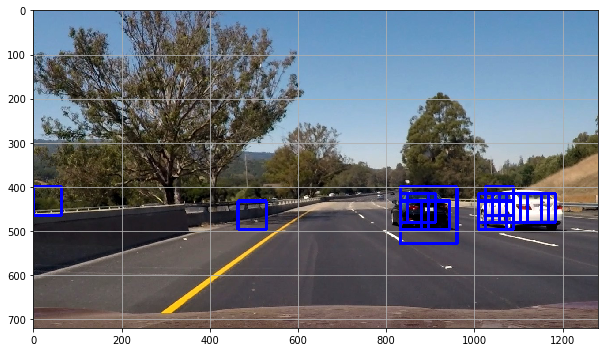

[]

In [59]:
with open('trainedSVM64x64.p', 'rb') as file:
    params = pickle.load(file)
print(params)
color_space = params['color_space']
patch_size = params['patch_size']
spatial_size = params['spatial_size']
hist_bins = params['hist_bins']
orient = params['orient']
pix_per_cell = params['pix_per_cell']
cell_per_block = params['cell_per_block']
hog_channel = params['hog_channel']
svc = params['svc']
X_scalar = params['X_scalar']

# filename='test_images2/straight_lines2.jpg'
filename='test_images/test6.jpg'
image=cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
print("image max:", np.max(image))
print("image shape:", image.shape)
# plt.figure(figsize=(10,5))
# plt.imshow(image)
# plt.tight_layout()
# plt.show()

scale = 1
ystart=400
ystop=700
bb = np.copy(image)
allbboxes = []
bboxes, bb = find_cars(bb, image, ystart, ystop, scale, svc, X_scalar, orient, pix_per_cell, 
               cell_per_block, patch_size, spatial_size, hist_bins, params, hog_channel, color_space)

allbboxes.extend(bboxes)

scale = 2.0
ystart=400
ystop=700
bboxes, bb = find_cars(bb, image, ystart, ystop, scale, svc, X_scalar, orient, pix_per_cell, 
               cell_per_block, patch_size, spatial_size, hist_bins, params, hog_channel, color_space)
allbboxes.extend(bboxes)

scale = 3.0
ystart=400
ystop=700
bboxes, bb = find_cars(bb, image, ystart, ystop, scale, svc, X_scalar, orient, pix_per_cell, 
               cell_per_block, patch_size, spatial_size, hist_bins, params, hog_channel, color_space)
allbboxes.extend(bboxes)

# computeHeat(image, allbboxes, visualize=True)

plt.figure(figsize=(10,5))
plt.imshow(bb)
plt.tight_layout()
plt.grid()
plt.show()
bboxes

/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


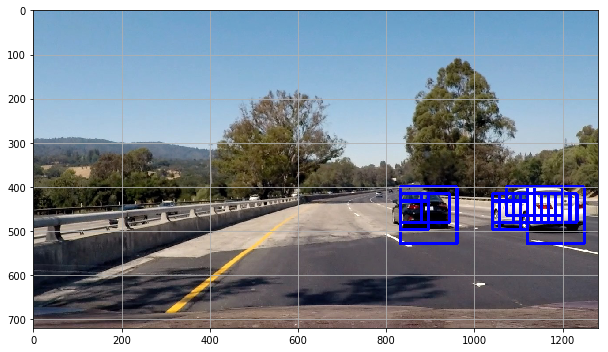

[((832, 400), (960, 528), 0.66825939744211194),
 ((1120, 400), (1248, 528), 1.1549865469935965)]

In [74]:
scale = 2.0
ystart=400
ystop=700
bboxes, bb = find_cars(bb, image, ystart, ystop, scale, svc, X_scalar, orient, pix_per_cell, 
               cell_per_block, patch_size, spatial_size, hist_bins, hog_channel, color_space)

plt.figure(figsize=(10,5))
plt.imshow(bb)
plt.tight_layout()
plt.grid()
plt.show()

bboxes

/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


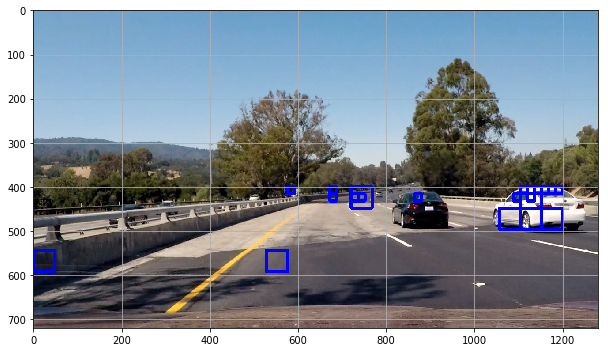

[((0, 544), (48, 592), 0.011539627278850918), ((528, 544), (576, 592), 0.45938562405354877), ((720, 400), (768, 448), 1.1323864880239827), ((1056, 448), (1104, 496), 2.2950189518239972), ((1104, 400), (1152, 448), 0.042485986397428448), ((1104, 448), (1152, 496), 2.7714675657183054), ((1152, 448), (1200, 496), 1.3059456878701725)]
(720, 1280, 3)


In [79]:
scale = 3.0
ystart=400
ystop=700
bboxes, bb = find_cars(bb, image, ystart, ystop, scale, svc, X_scalar, orient, pix_per_cell, 
               cell_per_block, patch_size, spatial_size, hist_bins, hog_channel, color_space)

plt.figure(figsize=(10,5))
plt.imshow(bb)
plt.tight_layout()
plt.grid()
plt.show()
print(bboxes)
print(image.shape)


{'orient': 9, 'patch_size': (32, 32), 'hist_bins': 16, 'cell_per_block': 2, 'color_space': 'HSV', 'svc': LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'X_scalar': StandardScaler(copy=True, with_mean=True, with_std=True), 'pix_per_cell': 8, 'hog_channel': 'ALL', 'spatial_size': (16, 16)}


/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


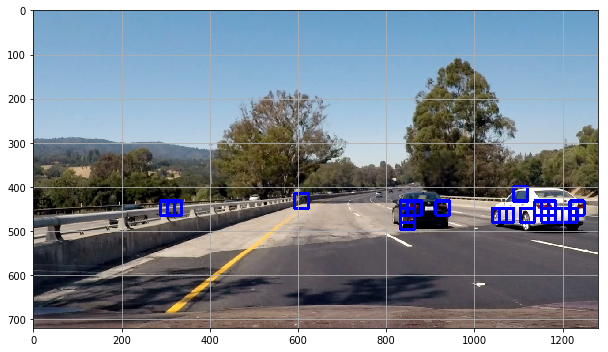

[((288, 432), (320, 464), 0.50866686477698453), ((304, 432), (336, 464), 1.3461998848708339), ((592, 416), (624, 448), 0.10356644117371211), ((832, 432), (864, 464), 0.19215770287970241), ((832, 448), (864, 480), 0.34227312495215145), ((832, 464), (864, 496), 0.64174837831423115), ((848, 432), (880, 464), 0.38634551194140548), ((912, 432), (944, 464), 0.37504208336507722), ((1040, 448), (1072, 480), 2.8696868709549475), ((1056, 448), (1088, 480), 0.38266939079622758), ((1088, 400), (1120, 432), 0.33509063516571386), ((1104, 448), (1136, 480), 2.3204189136765572), ((1136, 432), (1168, 464), 2.4575887810714176), ((1152, 432), (1184, 464), 2.326905582726051), ((1152, 448), (1184, 480), 0.49890253434987902), ((1168, 448), (1200, 480), 0.20765948842279419), ((1184, 448), (1216, 480), 1.0144504609501213), ((1200, 448), (1232, 480), 0.39670243314751219), ((1216, 432), (1248, 464), 0.94981381971859824)]


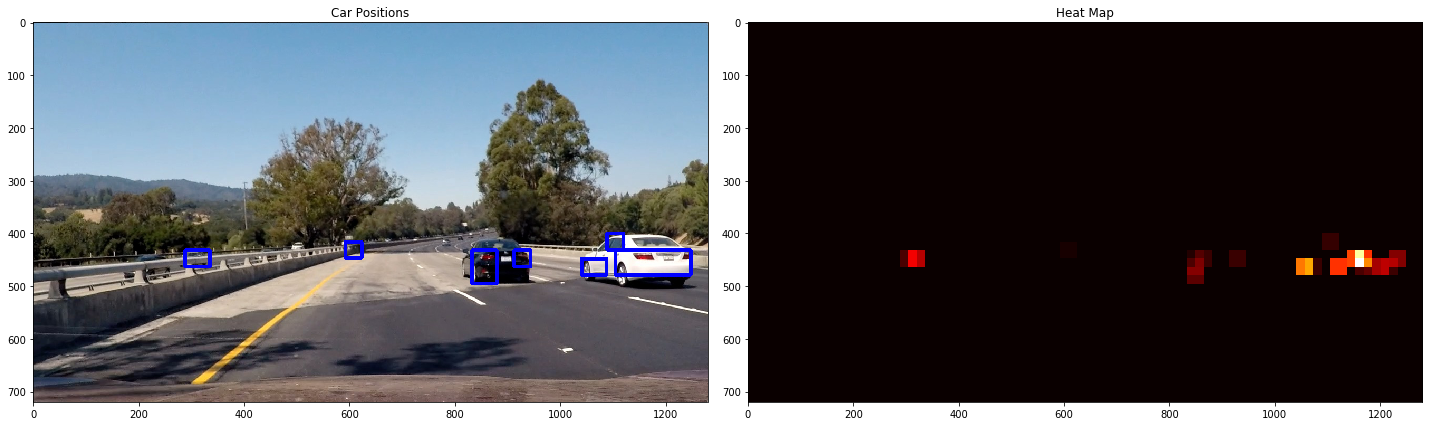

array([[[ 48,  57,  64],
        [ 36,  46,  55],
        [ 33,  45,  57],
        ..., 
        [181, 182, 186],
        [215, 211, 208],
        [248, 241, 235]],

       [[ 29,  47,  61],
        [ 21,  40,  55],
        [ 62,  83, 100],
        ..., 
        [137, 153, 166],
        [155, 164, 173],
        [192, 197, 203]],

       [[ 11,  41,  65],
        [ 74, 106, 129],
        [125, 159, 186],
        ..., 
        [124, 155, 183],
        [132, 158, 181],
        [136, 158, 179]],

       ..., 
       [[ 75,  65,  64],
        [ 99,  87,  87],
        [100,  88,  88],
        ..., 
        [ 94,  77,  70],
        [106,  89,  82],
        [142, 125, 118]],

       [[ 65,  55,  54],
        [104,  92,  92],
        [107,  95,  95],
        ..., 
        [ 82,  64,  60],
        [101,  83,  79],
        [133, 118, 113]],

       [[ 34,  24,  23],
        [ 78,  68,  67],
        [112, 100, 100],
        ..., 
        [ 75,  57,  53],
        [116, 101,  96],
        [149, 134,

In [87]:
with open('trainedSVM32x32.p', 'rb') as file:
    params = pickle.load(file)
print(params)
color_space = params['color_space']
patch_size = params['patch_size']
spatial_size = params['spatial_size']
hist_bins = params['hist_bins']
orient = params['orient']
pix_per_cell = params['pix_per_cell']
cell_per_block = params['cell_per_block']
hog_channel = params['hog_channel']
svc = params['svc']
X_scalar = params['X_scalar']

#lots of false positives when scaling smaller than trained size
scale = 1.0
ystart=400
ystop=700
bb = np.copy(image)
bboxes, bb = find_cars(bb, image, ystart, ystop, scale, svc, X_scalar, orient, pix_per_cell, 
               cell_per_block, patch_size, spatial_size, hist_bins, hog_channel, color_space)

plt.figure(figsize=(10,5))
plt.imshow(bb)
plt.tight_layout()
plt.grid()
plt.show()
print(bboxes)

computeHeat(image, bboxes, visualize=True)

{'orient': 9, 'patch_size': (16, 16), 'hist_bins': 16, 'cell_per_block': 2, 'color_space': 'HSV', 'svc': LinearSVC(C=0.0011, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'X_scalar': StandardScaler(copy=True, with_mean=True, with_std=True), 'pix_per_cell': 8, 'hog_channel': 2, 'spatial_size': (16, 16)}


/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


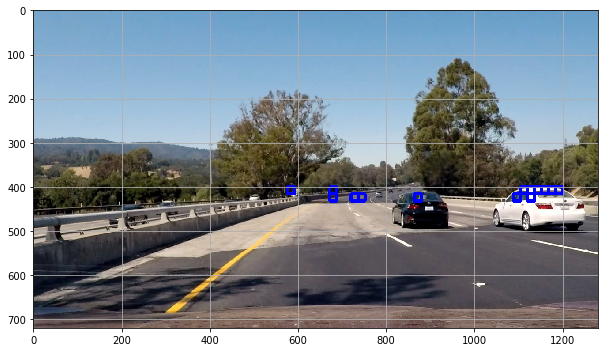

[((576, 400), (592, 416), 0.48433879438446836),
 ((672, 400), (688, 416), 0.10192680939878918),
 ((672, 416), (688, 432), 0.66056317869777725),
 ((720, 416), (736, 432), 0.62431059335082173),
 ((736, 416), (752, 432), 1.202280425964275),
 ((864, 416), (880, 432), 0.33691770465124338),
 ((1088, 416), (1104, 432), 0.40396842297826646),
 ((1104, 400), (1120, 416), 0.55525788745107818),
 ((1120, 400), (1136, 416), 0.63189871760620686),
 ((1120, 416), (1136, 432), 3.0369464547529494),
 ((1136, 400), (1152, 416), 2.4920719541992935),
 ((1152, 400), (1168, 416), 1.7691524855800049),
 ((1168, 400), (1184, 416), 0.53492357628943665),
 ((1184, 400), (1200, 416), 0.95802620686202078)]

In [77]:
with open('trainedSVM16x16.p', 'rb') as file:
    params = pickle.load(file)
print(params)
color_space = params['color_space']
patch_size = params['patch_size']
spatial_size = params['spatial_size']
hist_bins = params['hist_bins']
orient = params['orient']
pix_per_cell = params['pix_per_cell']
cell_per_block = params['cell_per_block']
hog_channel = params['hog_channel']
svc = params['svc']
X_scalar = params['X_scalar']


#even more false positives when scaling smaller than trained size
scale = 1.0
ystart=400
ystop=450
bb = np.copy(image)
bboxes, bb = find_cars(bb, image, ystart, ystop, scale, svc, X_scalar, orient, pix_per_cell, 
               cell_per_block, patch_size, spatial_size, hist_bins, hog_channel, color_space)

plt.figure(figsize=(10,5))
plt.imshow(bb)
plt.tight_layout()
plt.grid()
plt.show()

bboxes

In [48]:
import vehicledet2
importlib.reload(vehicledet2)
from vehicledet2 import *

### Notes
Larger windows are easier to detect - more information to distinguish between car and other.

Once you go smaller than the trained classification you lose information.
Have different thresholds for heatmap summation for each window size.
Large windows have lower threshold to accept vehicle detection.
Small windows need large thresholds.

Also try training HOG on smaller windows to see if that improves detection accuracy.



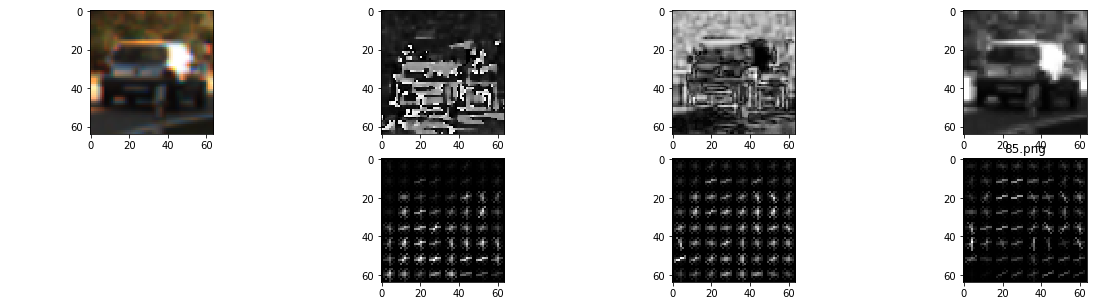

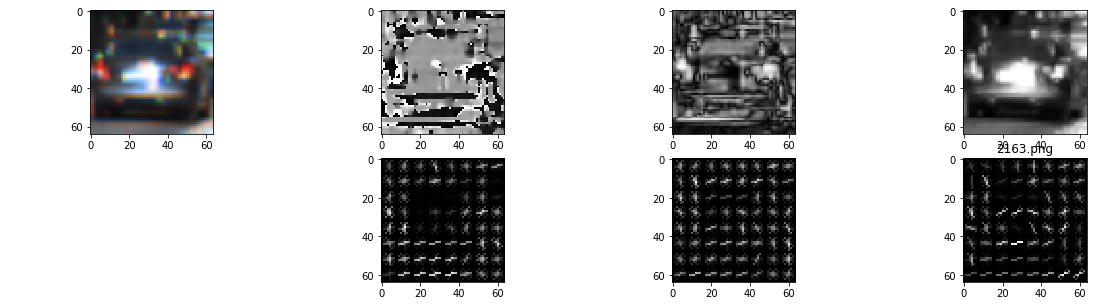

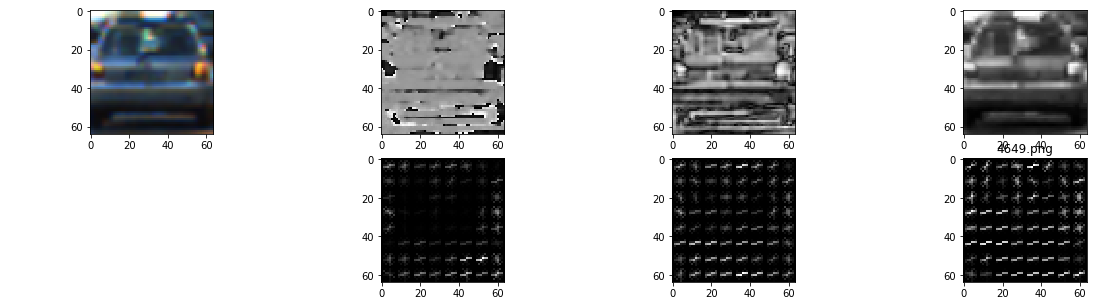

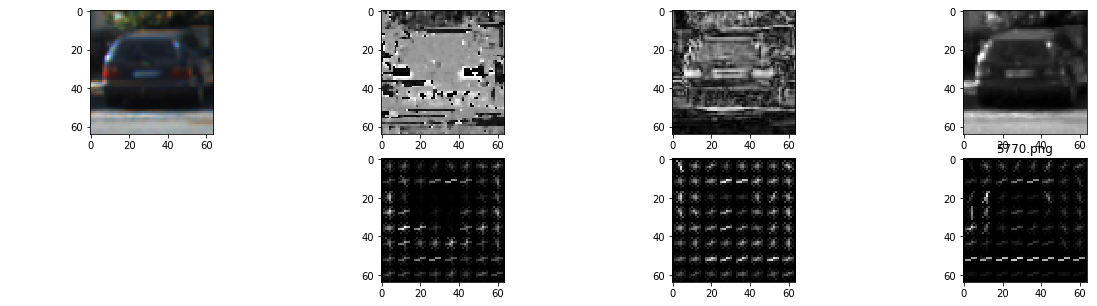

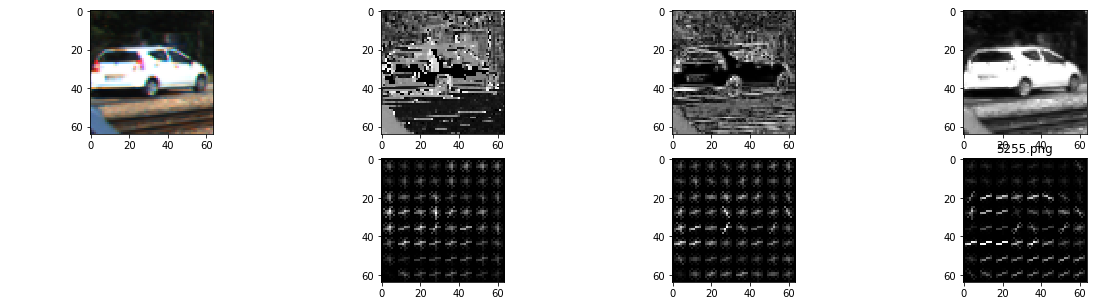

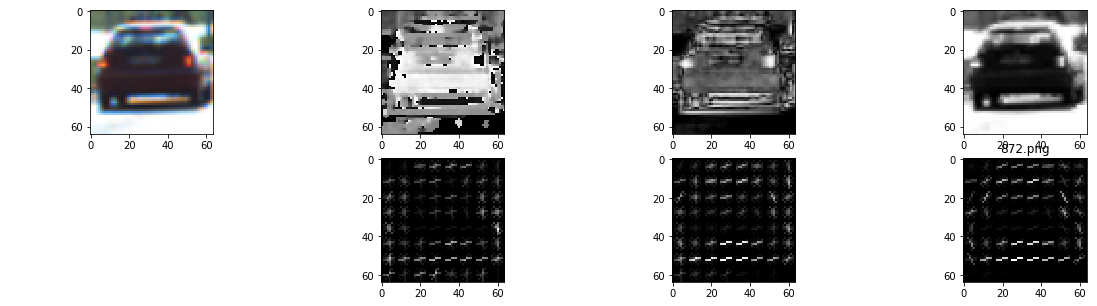

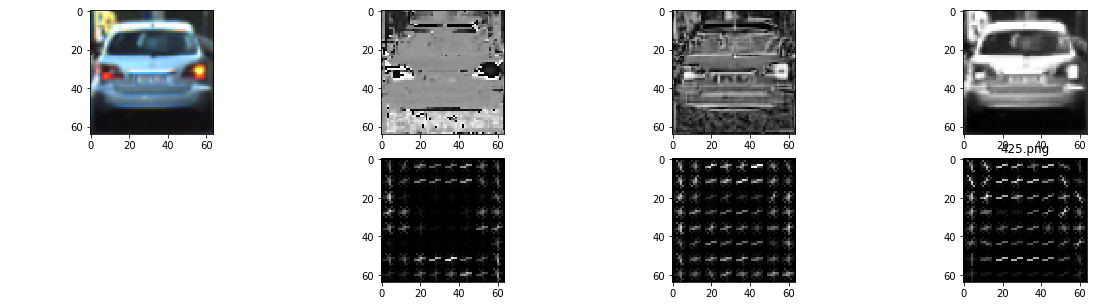

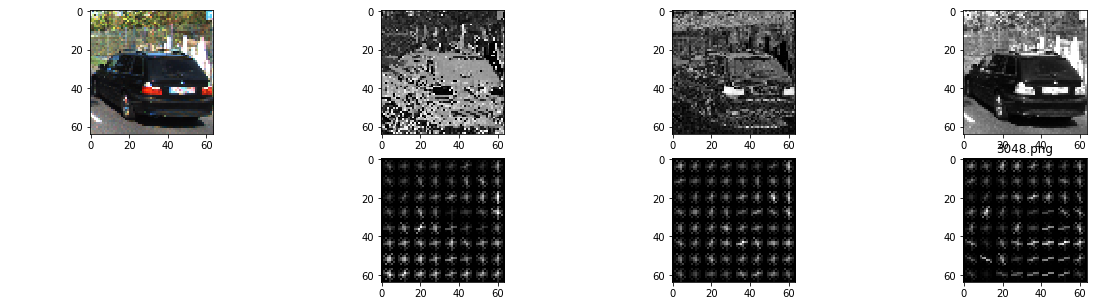

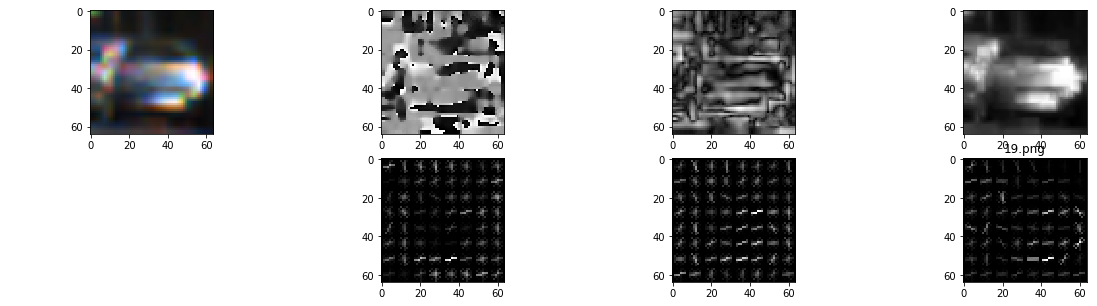

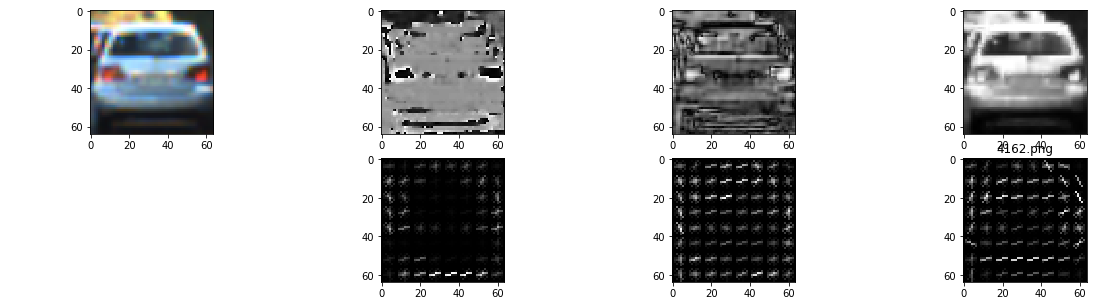

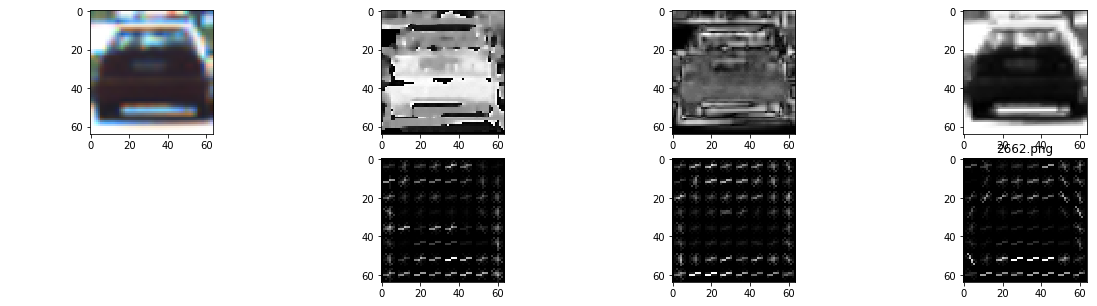

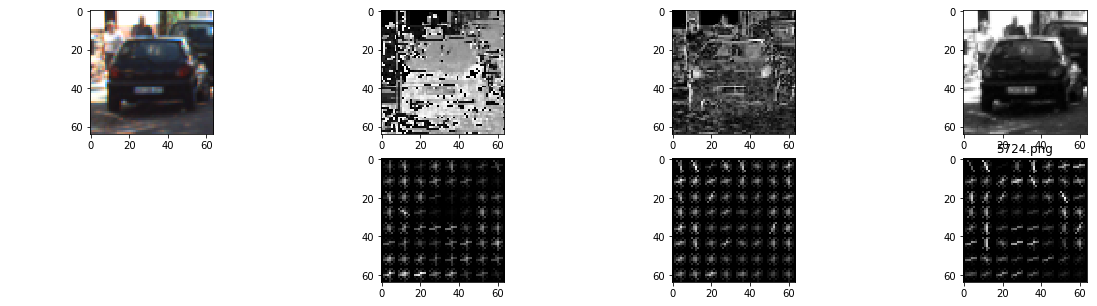

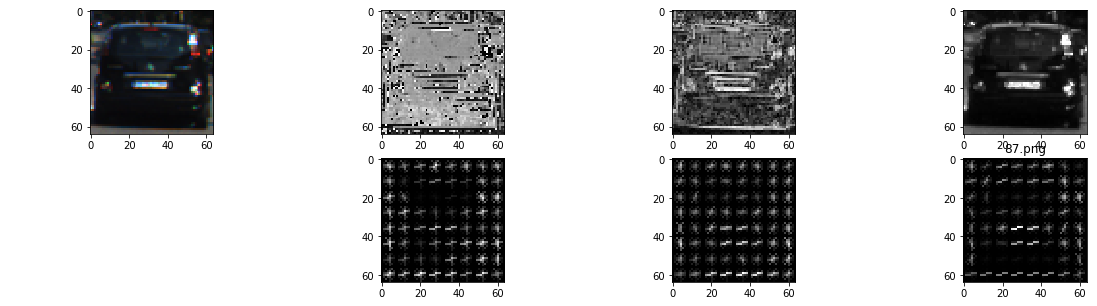

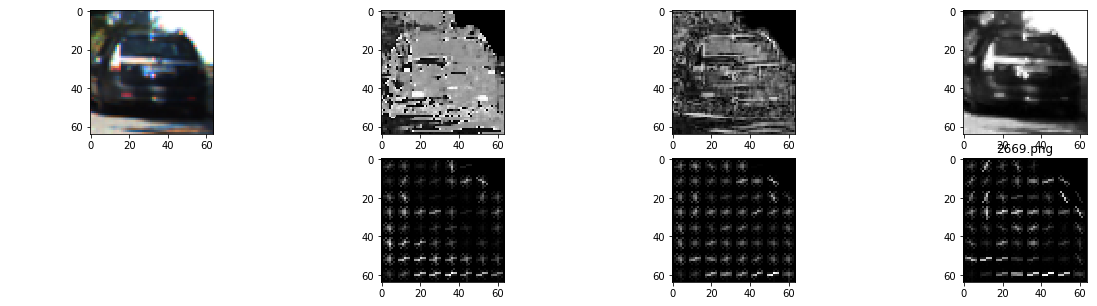

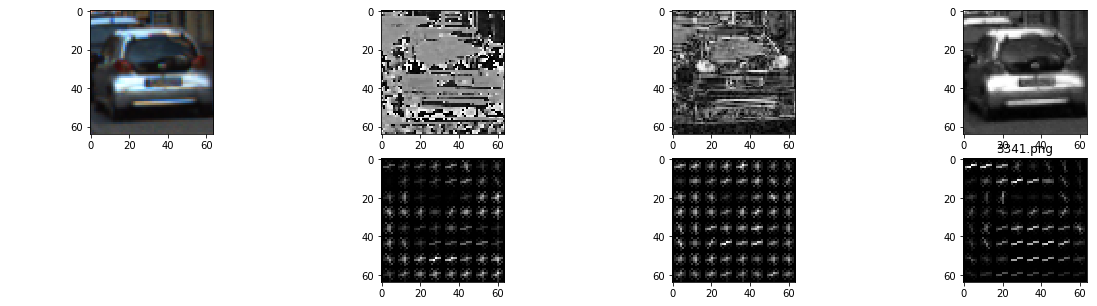

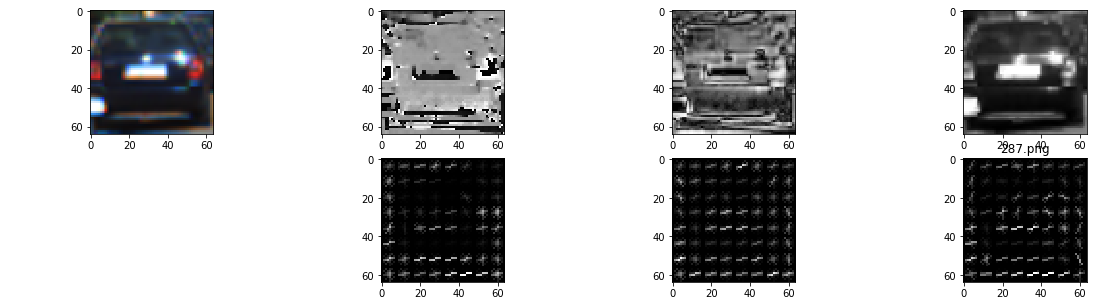

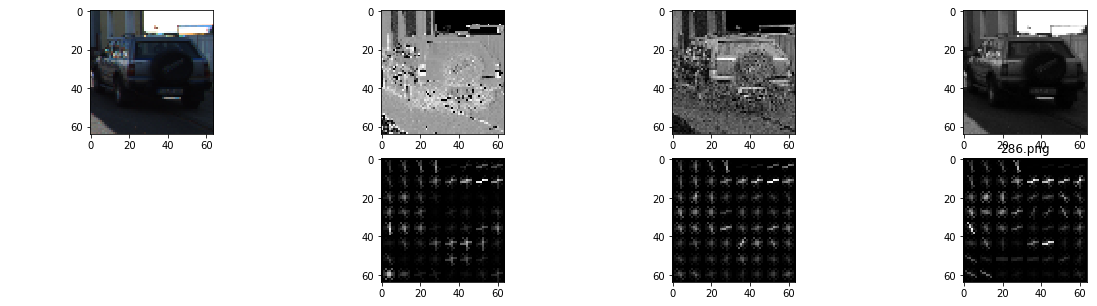

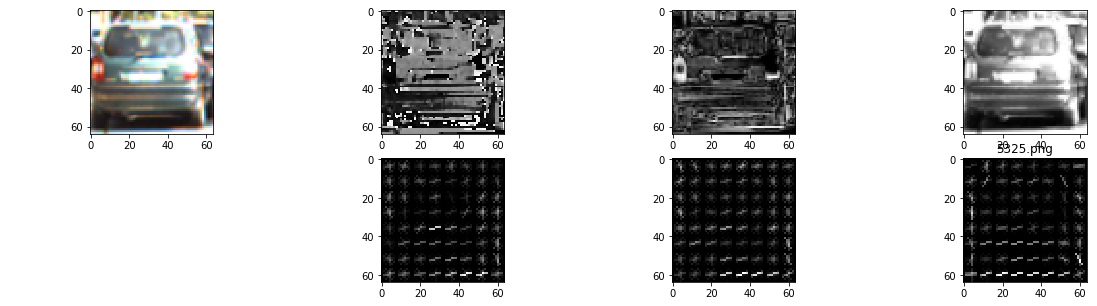

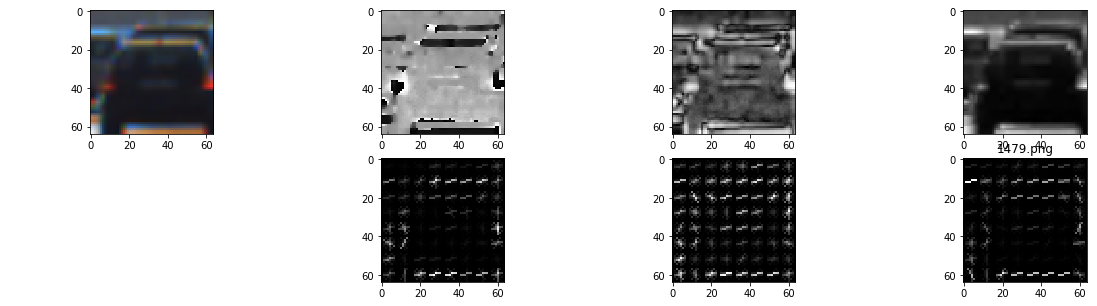

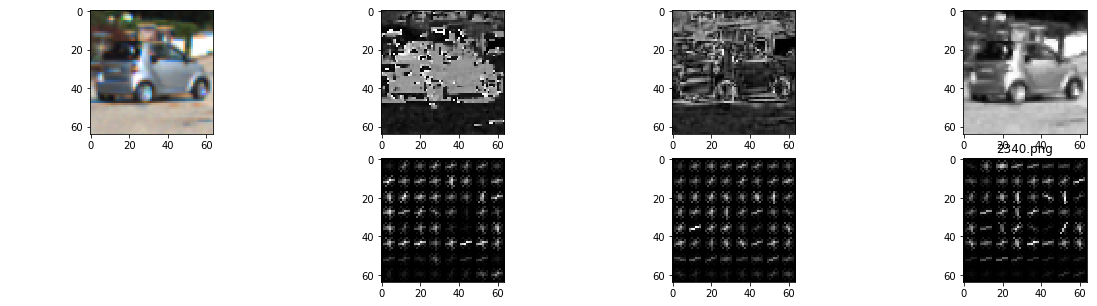

In [53]:
import os.path
kittis = glob.glob('vehicles/KITTI_extracted/*.png')
for n in range(0,20):
#     filename='vehicles/KITTI_extracted/1229.png'
    filename = kittis[n]
    # image=mpimg.imread(filename).astype(np.float32)
    image = cv2.imread(filename)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imghsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # plt.figure(figsize=(10,5))
    f, axs = plt.subplots(2, 4, figsize=(20,5))
    axs[0,0].imshow(img, cmap='gray')
    plt.title(os.path.basename(filename))
    axs[0,1].imshow(imghsv[:,:,0], cmap='gray')
    axs[0,2].imshow(imghsv[:,:,1], cmap='gray')
    axs[0,3].imshow(imghsv[:,:,2], cmap='gray')
    axs[1,0].axis('off')
    feat, vis = get_hog_features(imghsv[:,:,0], orient=9, pix_per_cell=8, cell_per_block=2,
                        vis=True, feature_vec=True)
    axs[1,1].imshow(vis, cmap='gray')
    feat, vis = get_hog_features(imghsv[:,:,1], orient=9, pix_per_cell=8, cell_per_block=2,
                        vis=True, feature_vec=True)
    axs[1,2].imshow(vis, cmap='gray')
    feat, vis = get_hog_features(imghsv[:,:,2], orient=9, pix_per_cell=8, cell_per_block=2,
                        vis=True, feature_vec=True)
    axs[1,3].imshow(vis, cmap='gray')
    plt.show()
    

Use HSV color scheme.
Although there are identifying characteristics in H and S, mainly the shape or outline of the vehicle is visible in V. While tail lights may appear bright or red in color, the rest of the image is noisy in the H and S channels, making gradient detection even more noisy.

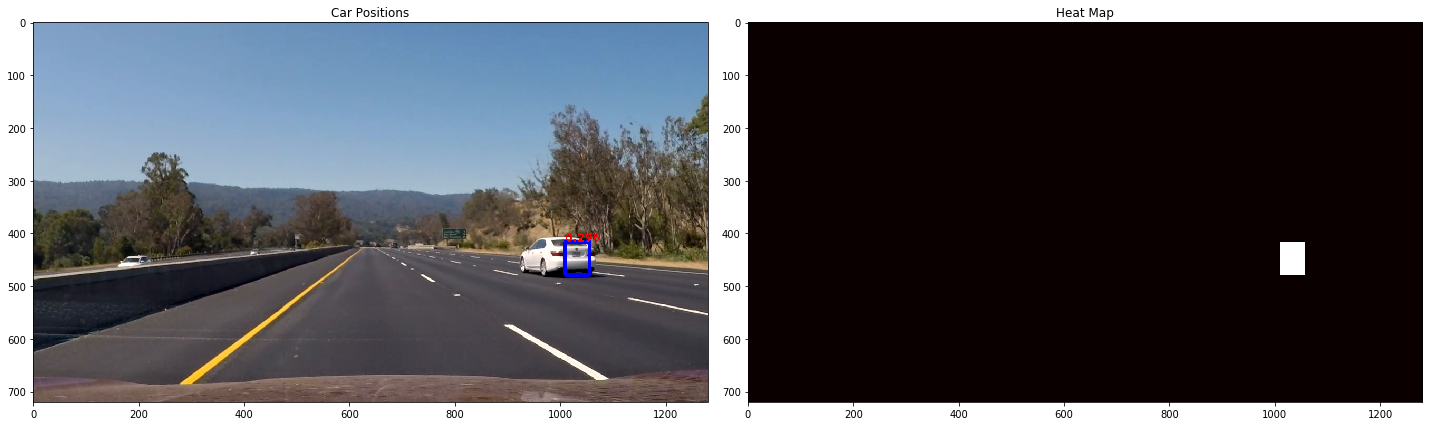

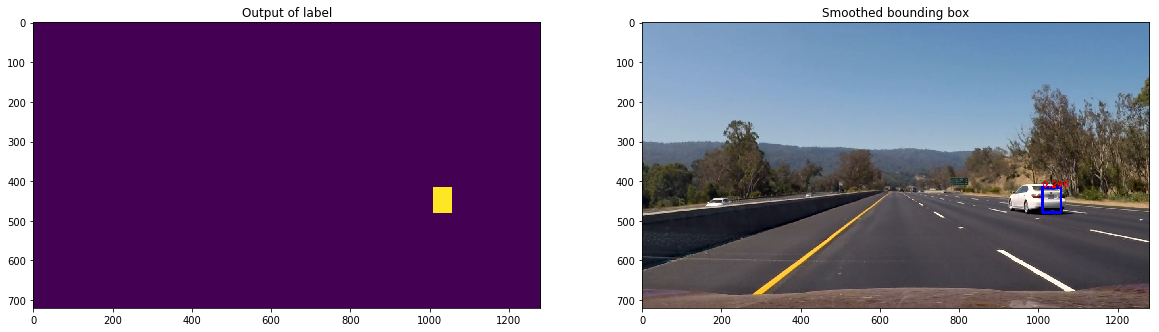

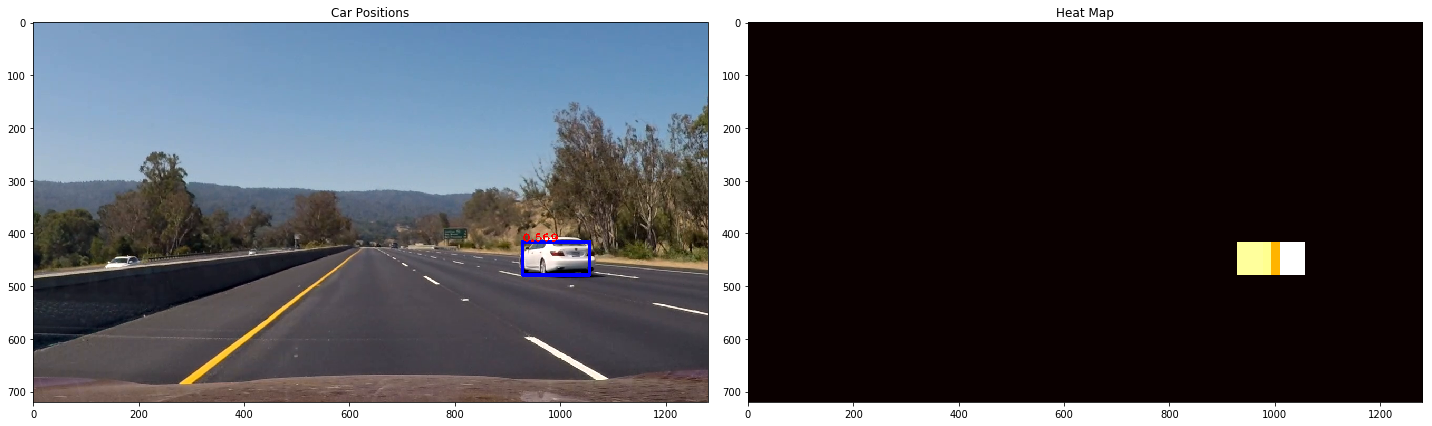

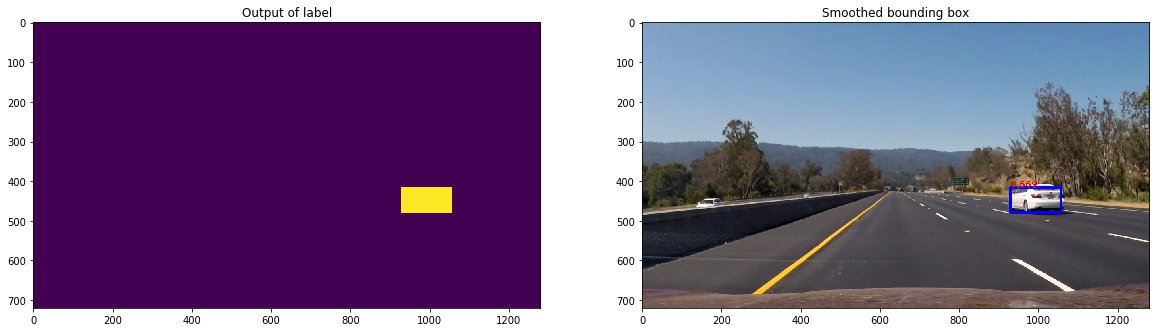

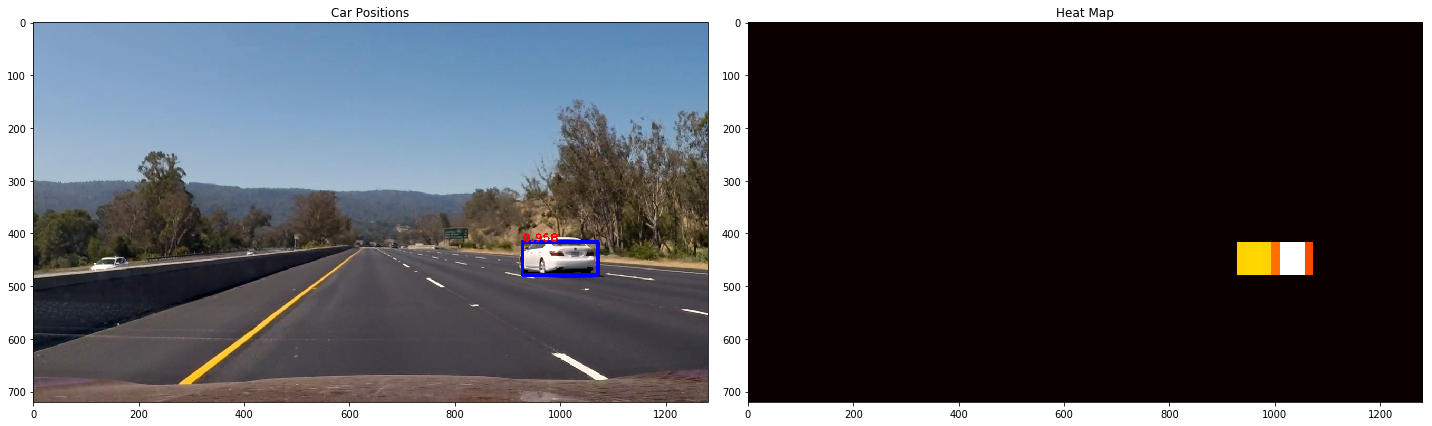

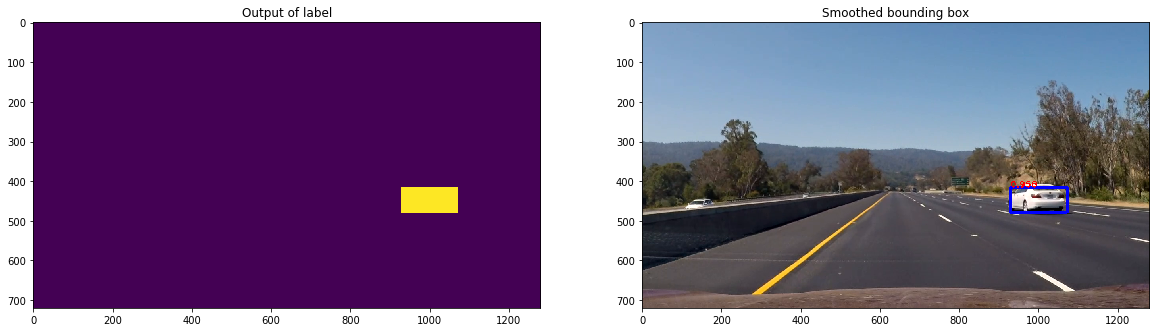

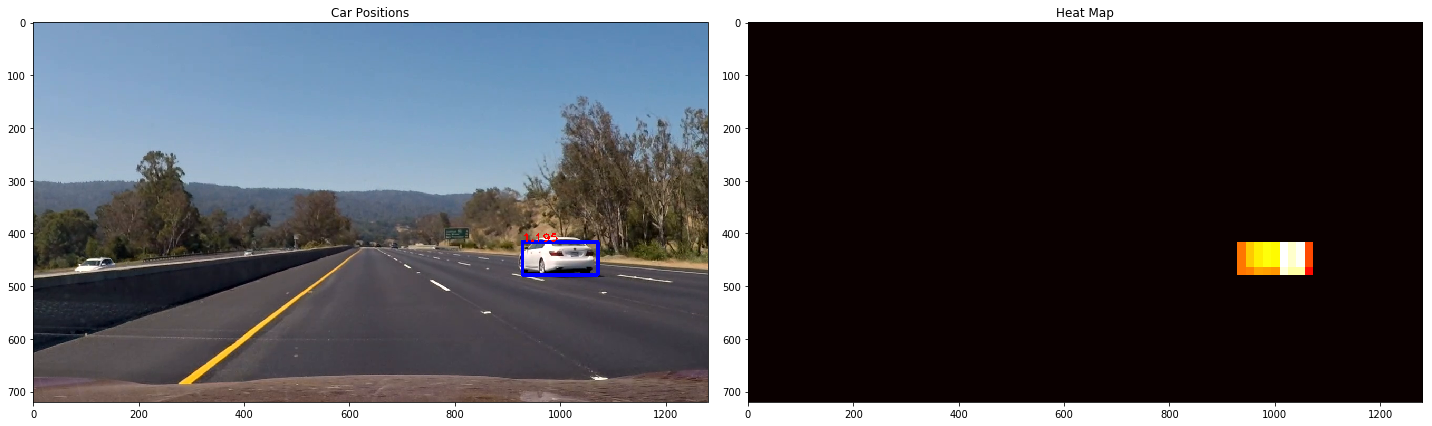

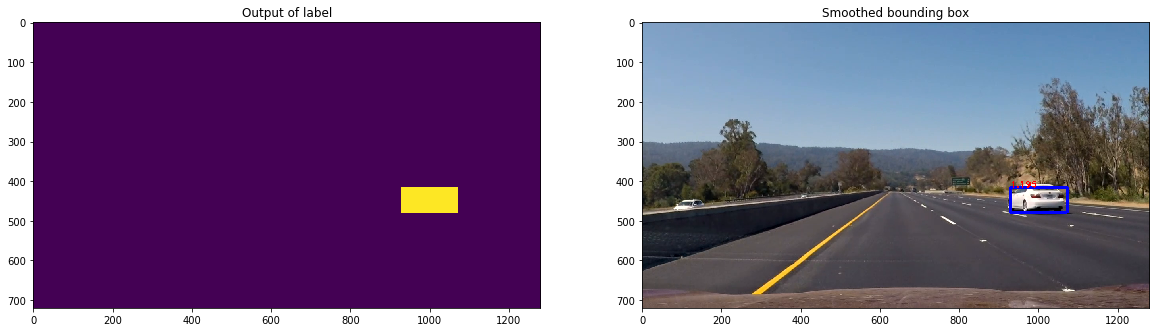

In [25]:
from moviepy.editor import VideoFileClip
importlib.reload(vehicledet2)
from vehicledet2 import *

clip1 = VideoFileClip("project_video.mp4")
clipsub = clip1.subclip(t_start=16.32)
imgiter = clipsub.iter_frames()
img = next(imgiter)
initialize(img, n=4)
for n in range(4):
    img = next(imgiter)
    out = processImage(img, visualize=True)
    plt.figure(figsize=(20,5))
#     plt.imshow(out)
#     plt.show()


In [ ]:
from moviepy.editor import VideoFileClip
importlib.reload(vehicledet2)
from vehicledet2 import *

outputname = 'output_images/project_video_processed.mp4'
clip1 = VideoFileClip("project_video.mp4")
imgiter = clip1.iter_frames()
img = next(imgiter)
initialize(img, n=10)
outclip = clip1.fl_image(processImage)
outclip.write_videofile(outputname, audio=False)

In [20]:
print(clip1.fps)

25.0


In [26]:
# Try PCA if that reduces overfitting
importlib.reload(vehicledet2)
from vehicledet2 import *

# pre analysis
pcaa, X = preprocessPCA(color_space='HSV', hog_channel = 2, patch_size=(64,64), spatial_feat=True)
# choose num components
ncomp = np.sum(pcaa.explained_variance_ratio_ > 1e-5)
pca = PCA(n_components = ncomp)
pca.fit(x)

np.sum(pca.explained_variance_ratio_ > 1e-5)

(17760, 2580)


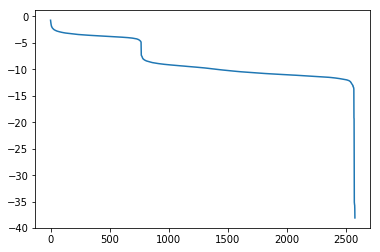

(2580,)
2580
768


In [31]:
plt.plot(np.log10(pca.explained_variance_ratio_))
plt.show()
print(pca.explained_variance_ratio_.shape)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_ > 1e-5))